In [16]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [18]:
data = pd.read_csv('/content/test.csv')

In [19]:
data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [20]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## Question 1
Import the data and do the following:

-> Examine the data types--there are many columns, so it might be wise to use value counts.


-> Determine if the floating point values need to be scaled.
Determine the breakdown of each activity.


-> Encode the activity label as an integer.

In [21]:
data.dtypes.value_counts()

,count
float64,561
int64,1
object,1


In [22]:
data.dtypes.tail()

,0
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64
Activity,object


In [23]:
data.iloc[:, :-1].min().value_counts()

,count
-1.000000,134
-0.998936,4
-0.999994,2
-0.998434,2
-0.999941,2
...,...
-0.449778,1
-0.843914,1
-0.999213,1
-0.999654,1


In [24]:
data.iloc[:, :-1].max().value_counts()

,count
1.000000,110
0.479547,4
0.707774,2
0.838118,2
0.074716,2
...,...
0.117606,1
0.537401,1
0.234203,1
0.279590,1


In [25]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [26]:
data.Activity.value_counts()

,count
Activity,
LAYING,537
STANDING,532
WALKING,496
SITTING,491
WALKING_UPSTAIRS,471
WALKING_DOWNSTAIRS,420


Scikit learn classifiers won't accept a sparse
matrix for the prediction column. Thus, either
LabelEncoder needs to be used to convert the activity
labels to integers, or if DictVectorizer is used, the
resulting matrix must be converted to a non-sparse array.
Use LabelEncoder to fit_transform the "Activity" column,
and look at 5 random values

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

,Activity
1835,5
683,0
2098,0
504,1
1884,2


## Question 2
Calculate the correlations between the dependent variables.

Create a histogram of the correlation values.

Identify those that are most correlated (either positively or negatively).

In [28]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

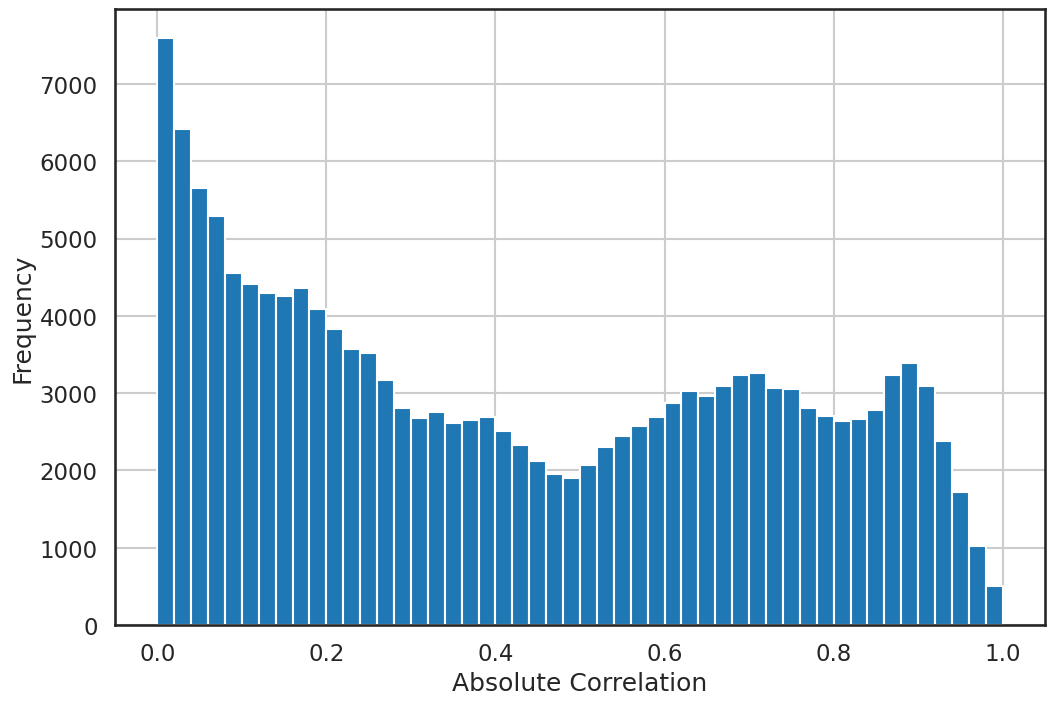

In [30]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [31]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
95172,tBodyAccMag-entropy(),tGravityAccMag-entropy(),1.000000,1.000000
109750,tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-sma(),1.000000,1.000000
96919,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94102,tBodyAccMag-sma(),tGravityAccMag-mean(),1.000000,1.000000
94818,tBodyAccMag-iqr(),tGravityAccMag-iqr(),1.000000,1.000000
...,...,...,...,...
22698,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993549,0.993549
23218,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.993817,0.993817
39300,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994339,0.994339
38813,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994526,0.994526


## Question 3
Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's StratifiedShuffleSplit to maintain the same ratio of predictor classes.



Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [33]:
y_train.value_counts(normalize=True)

,proportion
Activity,
0,0.182347
2,0.180407
3,0.168283
1,0.166343
5,0.160039
4,0.142580


In [34]:
y_test.value_counts(normalize=True)

,proportion
Activity,
0,0.181921
2,0.180791
3,0.168362
1,0.167232
5,0.159322
4,0.142373


## Question 4
Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.


Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [35]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [36]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [37]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

## Question 5
Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [38]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                     l1  \
            0         1         2         3         4         5    0   
346 -0.015355  0.023676 -0.127211  0.074700  0.140867 -0.128114  0.0   
68   0.088521  0.258211 -0.554233 -0.298060  0.279699 -0.109730  0.0   
34  -0.068512  0.075961  0.005255  0.114606  0.241452  0.039458  0.0   
446  0.081856  0.350819 -0.392897  0.234556 -0.114087  0.025732  0.0   
410  0.002756  0.103197  0.056041 -0.160517  0.190357  0.097685  0.0   
82   0.010304  0.090515 -0.090627  0.147182 -0.131205 -0.324515  0.0   
483  0.015166  0.158933  0.129162  0.058441  0.176225  0.066415  0.0   
140 -0.015826  0.041501 -0.117950  0.201910 -0.411536  0.463343  0.0   
225 -0.030443  0.384779 -0.398280 -0.288276 -0.098438  0.424453  0.0   
123 -0.009540 -0.399831  0.209664 -0.073658  0.142466  0.045897  0.0   

                                                             l2            \
            1         2         3         4         5         0         1   
346  0.000000  0.000000  0.000000  0.477501  0.000000 -0.009586  0.074383   
68   0.000000 -2.154363 -0.004329  0.111067  0.000000  0.053802  0.425743   
34   0.000000  0.000000  0.000000  0.897414  0.000000 -0.024419  0.033474   
446  0.000000 -1.383070  0.000000 -0.528133  0.000000  0.028452  0.765357   
410  0.000000  0.000000  0.000000  0.227128  0.000000  0.006516  0.163806   
82   0.000000  0.000000  0.000000  0.000000 -0.976303  0.002892  0.162243   
483  0.062375  0.000000  0.000000  0.207942  0.000000  0.015273  0.238985   
140  0.000000  0.000000  0.000000 -0.500528  0.889344 -0.011088  0.118741   
225  0.365501 -0.631507  0.000000  0.055859  0.292175 -0.017631  0.670804   
123  0.000000  0.000000  0.000000  0.003540  0.000000 -0.009412 -0.622655   

                                             
            2         3         4         5  
346 -0.428946  0.142376  0.161837 -0.175731  
68  -1.923153 -0.577996  0.350887 -0.300521  
34  -0.001452  0.379216  0.332216  0.043813  
446 -2.012472  0.550054 -0.155334  0.095892  
410  0.058630 -0.395146  0.203783  0.256261  
82  -0.166112  0.301645 -0.172248 -0.740898  
483  0.237295  0.116042  0.244310  0.190957  
140 -0.442190  0.435745 -0.516444  0.761526  
225 -1.375267 -0.804077 -0.130635  0.688298  
123  0.734263 -0.211129  0.169709  0.039127

In [ ]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

##Question 6¶

Predict and store the class for each model.
Store the probability for the predicted class for each model.

In [40]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,4,4,4
1,1,1,1
2,3,3,3
3,1,1,1
4,1,1,1


In [ ]:
y_prob.head()

## Question 7
For each model, calculate the following error metrics:

Accuracy


Precision


Recall


F-score


Confusion Matrix


Decide how to combine the multi-class metrics into a single value for each model.

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [43]:
metrics

,lr,l1,l2
precision,0.978849,0.973194,0.979802
recall,0.978531,0.972881,0.979661
fscore,0.978503,0.972752,0.979605
accuracy,0.978531,0.972881,0.979661
auc,0.986973,0.983552,0.987662


## Question 8
Display or plot the confusion matrix for each model.

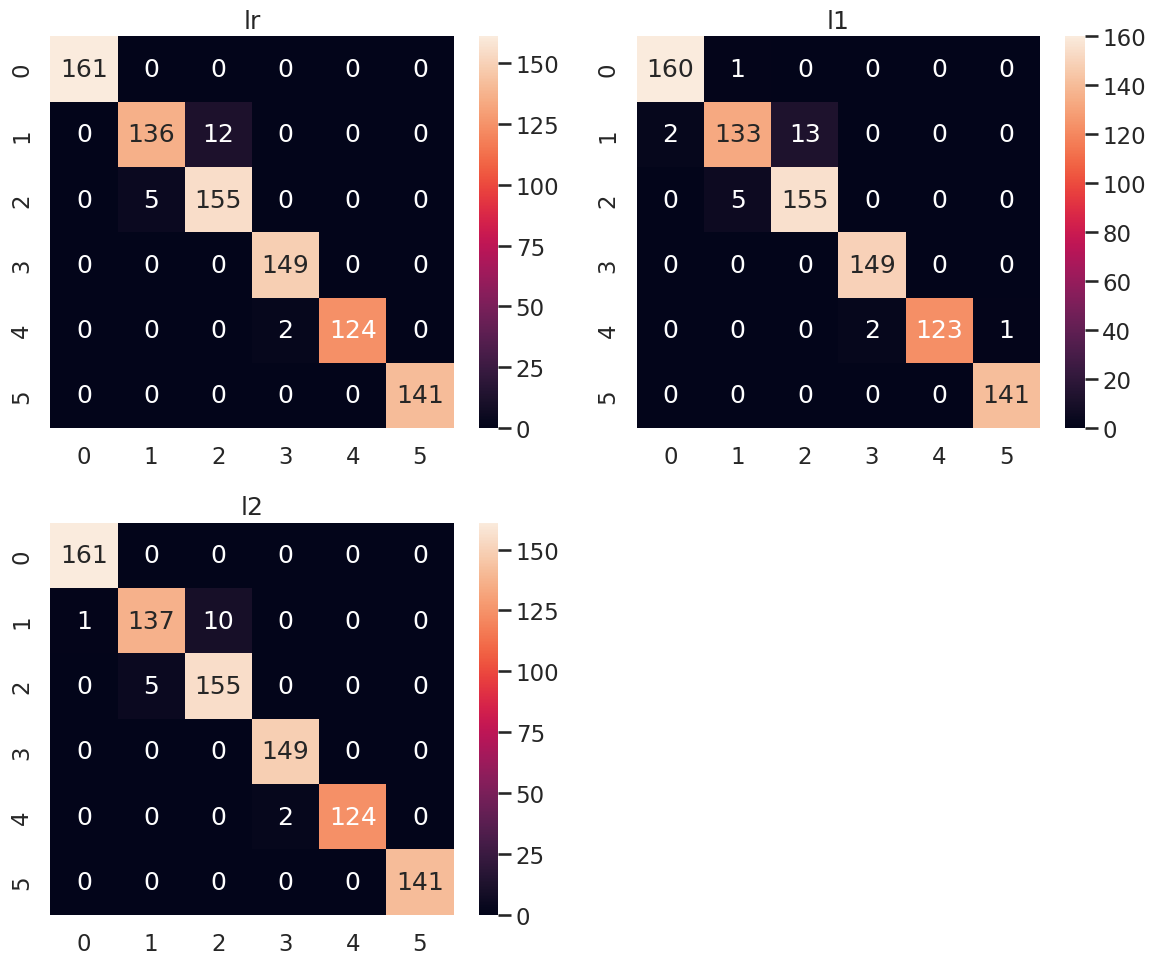

In [44]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()